In [10]:
import cv2
import numpy as np
import matplotlib.ticker as tic

from skimage import io, color, transform
from matplotlib import pyplot as plt

<Figure size 432x288 with 0 Axes>

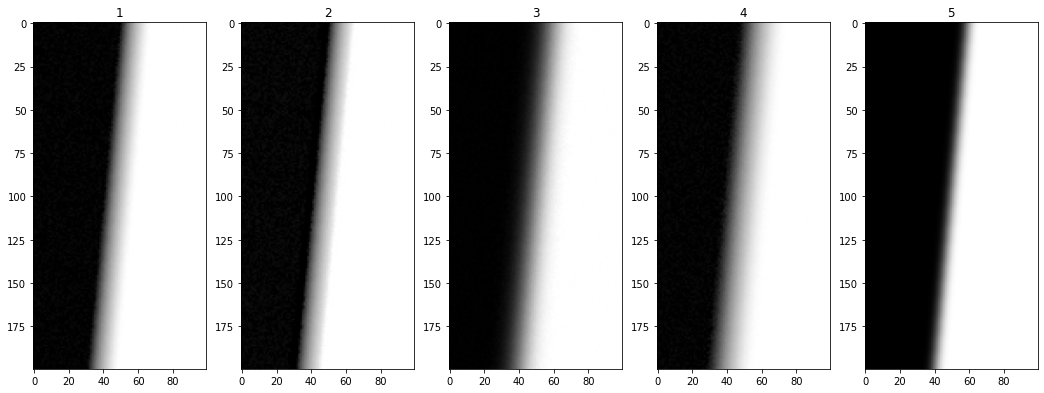

In [11]:
fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5] ) = plt.subplots(
    nrows=1, ncols=5,
    figsize=(18, 14)
)

ax1.set_title('1')
ax2.set_title('2')
ax3.set_title('3')
ax4.set_title('4')
ax5.set_title('5')

image1 = io.imread("1.png")
image2 = io.imread("2.png")
image3 = io.imread("3.png")
image4 = io.imread("cam-lens.png")
image5 = io.imread("cam.png")

ax1.imshow(image1,  cmap="gray")
ax2.imshow(image2,  cmap="gray")
ax3.imshow(image3,  cmap="gray")
ax4.imshow(image4,  cmap="gray")
ax5.imshow(image5,  cmap="gray")

plt.show()

In [12]:
# Выравнивание изображения для получения нормали 
def rotate_image(img): 
    img = transform.rotate(img, 5.3, preserve_range=True)
    row = img[len(img)//2] / 255
    image = np.full(img.shape, row)
    return image

In [13]:
# Функция размытия края полуплоскости
# Построение графика функции размытия полуплоскости
def draw_kf(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y, linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Краевая функция " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()

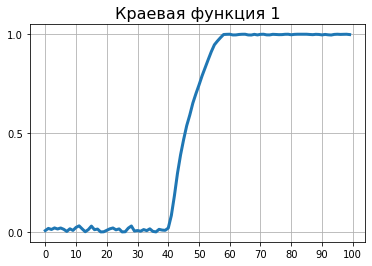

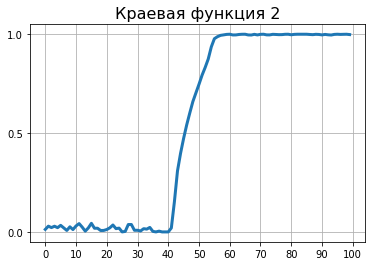

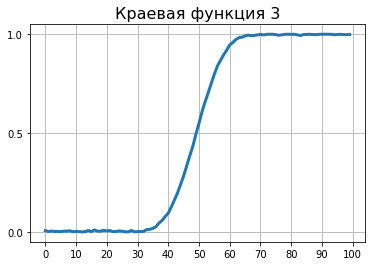

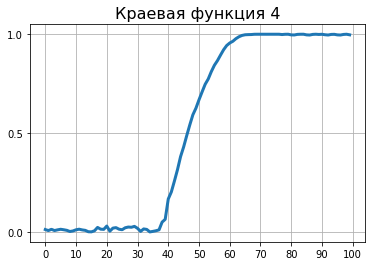

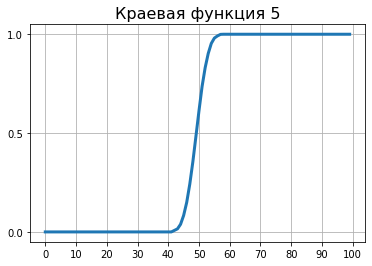

In [14]:
edg_1 = rotate_image(image1)
edg_2 = rotate_image(image2)
edg_3 = rotate_image(image3)
edg_4 = rotate_image(image4)
edg_5 = rotate_image(image5)

draw_kf(edg_1, '1')
draw_kf(edg_2, '2')
draw_kf(edg_3, '3')
draw_kf(edg_4, '4')
draw_kf(edg_5, '5')

In [15]:
# Функция размытия линии
# Построение графика функции размытия линии
def draw_frl(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 /= max(y1)   # Нормирование графика
    fig, ax = plt.subplots()
    ax.plot(x, y1, linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(10))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.2))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция размытия линии " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()

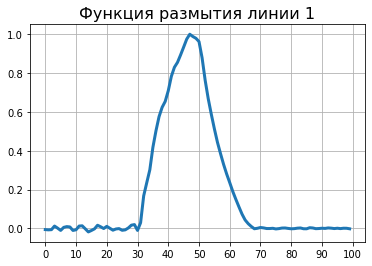

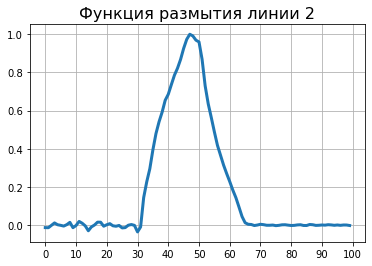

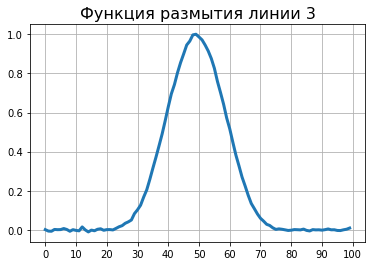

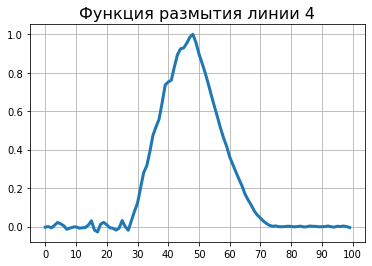

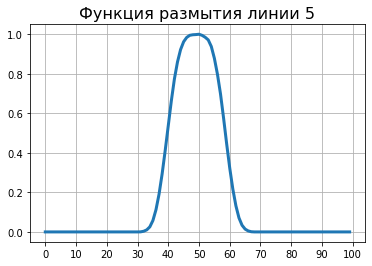

In [16]:
draw_frl(image1, '1')
draw_frl(image2, '2')
draw_frl(image3, '3')
draw_frl(image4, '4')
draw_frl(image5, '5')

In [17]:
#Функция передачи модуляции
#  Построение графика функции передачи модуляции
def draw_fpm(img, add_to_title = ""):
    y = np.mean(img, axis=0)
    x = np.arange(len(y))
    y1 = np.gradient(y)
    y1 = np.fft.fft(y1)    # Дискретное фурье преобразование
    fig, ax = plt.subplots()
    ax.plot(x[:len(x)//10], np.abs(y1 / max(y1))[:len(x)//10], linewidth = 3)

    #Устанавливаем интервал основных делений:
    ax.xaxis.set_major_locator(tic.MultipleLocator(1))
    ax.yaxis.set_major_locator(tic.MultipleLocator(0.5))

    fig.set_figwidth(6)
    fig.set_figheight(4)
    plt.title("Функция передачи модуляции " + add_to_title, fontsize=16)
    plt.grid()
    plt.show()

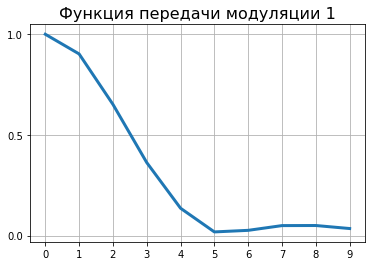

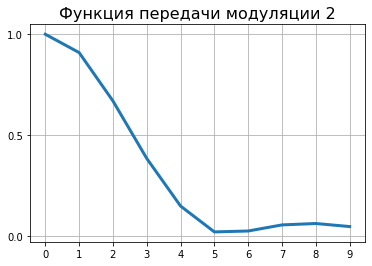

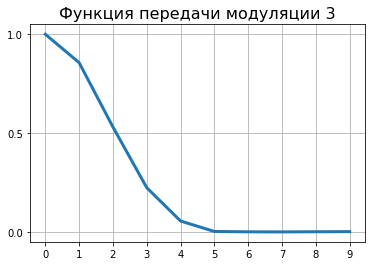

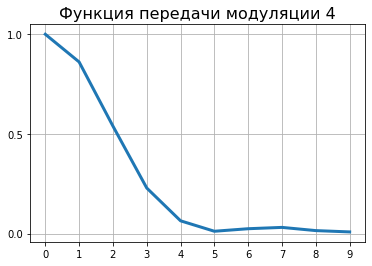

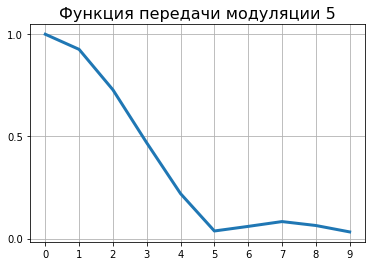

In [18]:
draw_fpm(image1, '1')
draw_fpm(image2, '2')
draw_fpm(image3, '3')
draw_fpm(image4, '4')
draw_fpm(image5, '5')